In [5]:
import pandas as pd
import torch
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.optimizers import Adam
# from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
# from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.optimizers import RMSprop
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator



1.   2nd element or index[1] of splitted image file path variable of description csv files represent **Study ID**.
2.   3rd element or index[2] represent **series iD**



#### **Labels are avaiable in description csv files**

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(227, 227, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# opt=tf.keras.optimizers.SGD(learning_rate=0.00001)
# model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,metrics=["accuracy"])

In [7]:
train_dir="/content/drive/MyDrive/cbis_ddsm/mass/train"
validation_dir="/content/drive/MyDrive/cbis_ddsm/mass/train" #change it after uploading test data

In [8]:
# training_datagen = ImageDataGenerator(
#       rescale = 1./255,
# 	    rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')

# validation_datagen = ImageDataGenerator(rescale = 1./255)

# train_generator = training_datagen.flow_from_directory(
# 	train_dir,
# 	target_size=(227, 227),
# 	class_mode='categorical',
#   batch_size=10
# )

# validation_generator = validation_datagen.flow_from_directory(
# 	validation_dir,
# 	target_size=(227, 227),
# 	class_mode='categorical',
#   batch_size=10
# )
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, color_mode="grayscale",image_size=(227,227), batch_size=10)
# test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, color_mode="grayscale",image_size=(227,227), batch_size=10)

Found 552 files belonging to 3 classes.


In [ ]:
# model.fit(train_images, train_labels,epochs=10)

In [9]:
sgd = keras.optimizers.SGD(learning_rate=0.001, momentum=0.1)
Adam0=keras.optimizers.Adam(learning_rate=0.003)

In [ ]:
# model.compile(loss="BinaryFocalCrossentropy", optimizer=sgd, metrics=["BinaryAccuracy"])

In [10]:
model.compile(optimizer=Adam0,#RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
history = model.fit(train_data,epochs=5)
""", batch_size=None, 
                    epochs=1, verbose='auto', callbacks=None, 
                    # validation_split=0.0, validation_data=None, 
                    shuffle=True, class_weight=None, sample_weight=None, 
                    initial_epoch=0, steps_per_epoch=None, 
                    # validation_steps=None,
                    # validation_batch_size=None, validation_freq=1, 
                    max_queue_size=10, workers=1, use_multiprocessing=False)
                    """

Epoch 1/5
56/56 [==============================] - 236s 3s/step - loss: 9.5332 - accuracy: 0.4819
Epoch 2/5
56/56 [==============================] - 107s 2s/step - loss: 0.8722 - accuracy: 0.5362
Epoch 3/5
56/56 [==============================] - 106s 2s/step - loss: 0.8459 - accuracy: 0.5181
Epoch 4/5
56/56 [==============================] - 105s 2s/step - loss: 0.7911 - accuracy: 0.5833
Epoch 5/5
56/56 [==============================] - 106s 2s/step - loss: 0.7828 - accuracy: 0.6250


", batch_size=None, \n                    epochs=1, verbose='auto', callbacks=None, \n                    # validation_split=0.0, validation_data=None, \n                    shuffle=True, class_weight=None, sample_weight=None, \n                    initial_epoch=0, steps_per_epoch=None, \n                    # validation_steps=None,\n                    # validation_batch_size=None, validation_freq=1, \n                    max_queue_size=10, workers=1, use_multiprocessing=False)\n                    "

In [13]:
import matplotlib.pyplot as plt

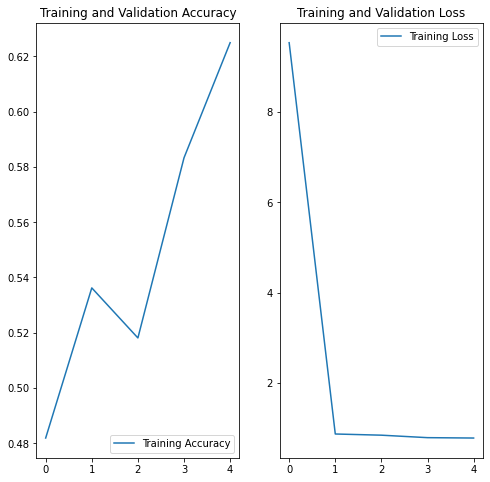

In [15]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


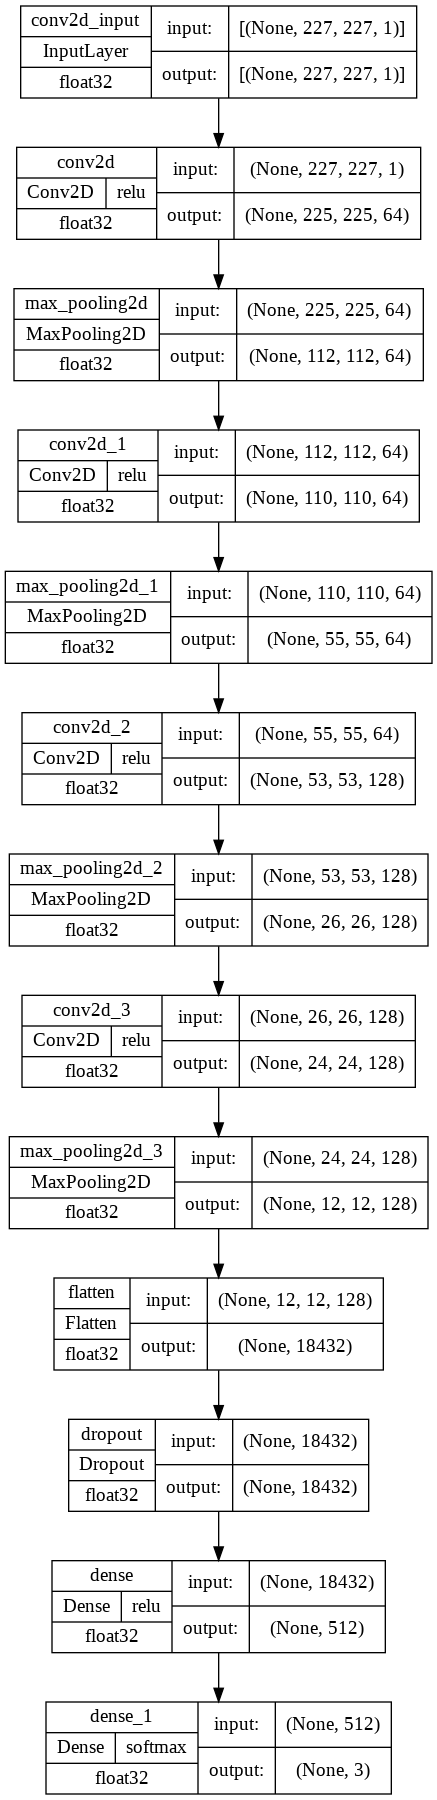

In [18]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96, layer_range=None, show_layer_activations=True)